<a href="https://colab.research.google.com/github/RinettaJW/collab/blob/main/Karina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

stroke = pd.read_csv('/content/train_strokes.csv')
stroke.info()
stroke.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

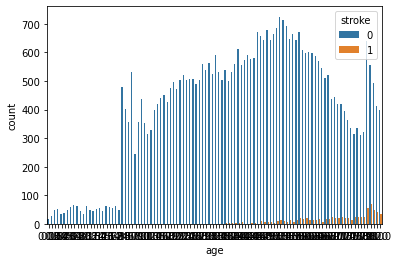

In [52]:
import seaborn as sns

sns.countplot(x = 'age', hue = 'stroke', data = stroke)

stroke['bmi'].fillna(stroke['bmi'].mean(), inplace = True)
stroke.isnull().sum()

In [53]:
stroke.drop(['id','gender', 'work_type', 'Residence_type','ever_married','smoking_status'], axis = 1, inplace = True)
stroke.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'avg_glucose_level','bmi']

scaler.fit(stroke[cols_to_scale])
stroke[cols_to_scale] = scaler.transform(stroke[cols_to_scale])

stroke.head(65)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,-1.741517,0,0,-0.217176,-1.388469,0
1,0.700823,1,0,-0.383258,1.387150,0
2,-1.519486,0,0,0.148621,-1.440839,0
3,1.233697,0,0,-0.822123,0.955096,0
4,-1.253049,0,0,1.317458,-1.244451,0
...,...,...,...,...,...,...
60,0.167949,0,0,-0.377923,0.090988,0
61,0.034730,0,0,0.249059,-0.969508,0
62,1.633353,0,0,-0.151996,0.339746,0
63,1.100479,0,1,2.881086,1.046744,1


In [55]:
from sklearn.utils import shuffle

In [56]:
zeros = stroke[stroke['stroke'] == 0][:1000]

In [57]:
ones = stroke[stroke['stroke'] == 1]

In [58]:
stroke = shuffle(pd.concat([zeros, ones]))

In [59]:
stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
18178,1.722165,1,0,-0.520114,0.000000,1
6526,1.677759,0,1,-0.833953,-0.576732,1
5771,0.123543,0,0,-0.935782,0.104081,1
673,-0.142894,0,0,-0.809597,-0.066122,0
19425,1.500134,1,0,-0.745113,1.413335,1
...,...,...,...,...,...,...
6632,1.500134,0,0,0.044704,0.000000,1
585,1.233697,0,0,-0.531016,-0.183955,0
516,0.967260,0,0,3.380028,-0.157770,0
37852,1.677759,0,0,0.051895,-0.105400,1


In [60]:
x_stroke = stroke.drop('stroke', axis = 1)
y_stroke = stroke['stroke']

x_stroke.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi
18178,1.722165,1,0,-0.520114,0.000000
6526,1.677759,0,1,-0.833953,-0.576732
5771,0.123543,0,0,-0.935782,0.104081


In [61]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(x_stroke, y_stroke)

LogisticRegression()

In [62]:
y_pred = model.predict(x_stroke)

In [63]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_stroke, y_pred)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels = pd.DataFrame(conf_matrix, columns =
['Прогноз не инсульт', 'Прогноз инсульт'], index = ['Факт без инсульта', 'Факт инсульт'])
conf_matrix_labels

,Прогноз не инсульт,Прогноз инсульт
Факт без инсульта,780,220
Факт инсульт,182,601


In [64]:
round((780 + 601) / (780 + 220 + 182 + 601), 3)

0.775

In [65]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_stroke, y_pred)
round(model_accuracy,3)

0.775

Шаг 4.

In [66]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 18178 to 154
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1783 non-null   float64
 1   hypertension       1783 non-null   int64  
 2   heart_disease      1783 non-null   int64  
 3   avg_glucose_level  1783 non-null   float64
 4   bmi                1783 non-null   float64
 5   stroke             1783 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 97.5 KB


In [67]:
import random
import numpy as np 

arr_glucose = []
for i in range(100):
  arr_glucose.append(str(round(random.uniform(55,272))))
n_age = np.random.randint(1,99,100)
n_hypertension = np.random.randint(0,2,100)
n_heart_disease = np.random.randint(0,2,100)
n_stroke = np.random.randint(0,2,100)
arr_bmi = []
for i in range(100):
  arr_bmi.append(str(round(random.uniform(16,40))))

data = {'age':n_age, 'hypertension':n_hypertension, 'heart_disease':n_heart_disease, "avg_glucose_level": arr_glucose, "bmi":arr_bmi, "stroke":n_stroke}

test = pd.DataFrame(data)
test.to_csv("test.csv", index = False)
test.head(100)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,42,0,0,60,17,0
1,60,0,0,217,39,0
2,37,0,0,192,32,1
3,54,0,0,101,33,0
4,5,0,0,136,32,1
...,...,...,...,...,...,...
95,98,0,1,269,34,0
96,44,0,0,267,27,1
97,64,0,1,104,36,1
98,84,0,1,213,23,0


In [68]:
test = pd.read_csv('/content/test.csv')
x_test = test

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'avg_glucose_level','bmi']

scaler.fit(test[cols_to_scale])
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

test.head(65)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,-0.316047,0,0,-1.767348,-1.623341,0
1,0.334850,0,0,0.707664,1.548374,0
2,-0.496851,0,0,0.313554,0.539192,1
3,0.117885,0,0,-1.121007,0.683360,0
4,-1.654001,0,0,-0.569253,0.539192,1
...,...,...,...,...,...,...
60,1.636644,0,1,0.849544,-1.623341,1
61,-1.473196,1,1,0.660371,1.260036,1
62,-1.364713,1,0,0.077088,-1.335004,0
63,-1.220070,0,0,1.511649,0.827529,0


In [70]:
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])
x_test = test.drop('stroke', axis = 1)
y_test = test['stroke']

# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model_test = LogisticRegression()
# обучим нашу модель
model_test.fit(x_test, y_test)

x_test.columns = x_test.columns.map(str)

y_pred_test = model_test.predict(x_test)


In [71]:
ids = [i for i in range(100)]
result = pd.DataFrame({"PatientID": ids, "HasStroke": y_pred_test})
result.to_csv('result.csv', index = False)
result.head(3)

,PatientID,HasStroke
0,0,0
1,1,0
2,2,0


In [72]:
# применим метод .download() объекта files
from google.colab import files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>